In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def divisor_function(x: float, n: int) -> float:
    a = math.isqrt(n)
    t = 0.0
    for i in range(1, a + 1):
        if n % i == 0:
            t += math.pow(i, x)
            if i * i != n:
                t += math.pow(n // i, x)
    return t
divisor_function(2, 6)

50.0

In [3]:
# we know that phi(0, n) < n < phi(1, n)
# we collect the divisors for better compliation

def f(n: int) -> float:
    # find x such that \sum_{d | n} d^x = n
    a = math.isqrt(n)
    v = []
    for i in range(1, a + 1):
        if n % i == 0:
            v.append(i)
            if i * i != n:
                v.append(n // i)
    # print(v)
    l = 0.0
    r = 1.0
    for _ in range(100):
        m = (l + r) / 2
        z = math.fsum([math.pow(i, m) for i in v])
        if math.isclose(z, n, abs_tol=1e-9):
            # print(z)
            break
        elif z > n:
            r = m
        else:
            l = m
    return m


f(math.factorial(10))
        

0.8902614085236564

In [4]:
f(1)

0.5

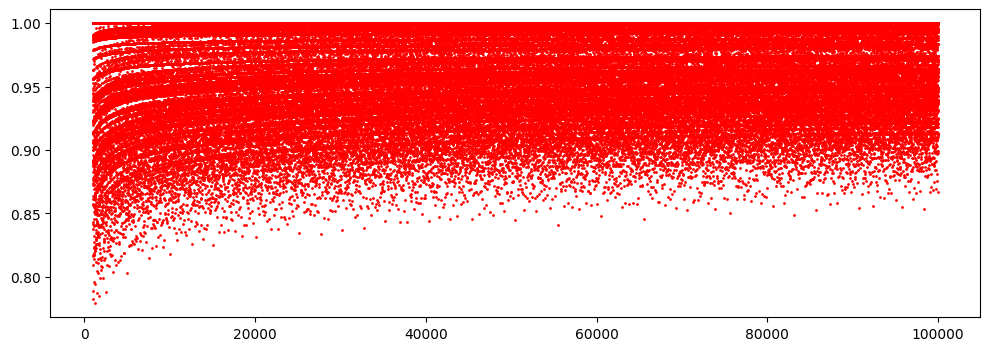

In [5]:
x = np.arange(1000, 100001)
f_vectorized = np.vectorize(f)
y = f_vectorized(x)

plt.figure(figsize=(12, 4))

plt.plot(x, y, "ro", markersize = 1)